# Preamble

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from scipy import stats
import pandas as pd
import seaborn as sns
from astropy.cosmology import Planck18
from sklearn.mixture import GaussianMixture
import corner

# Appendix Plots

In [2]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file:
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
    z = np.array(file['z_'+var])
file.close()

ns = len(Mc)

In [3]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_all'])
    means = np.array(file['mean_'+var+'_all'])
    covs = np.array(file['cov_'+var+'_all'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm, z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]
mask1 = logq_gm>0
logq_gm[mask1] = -logq_gm[mask1]

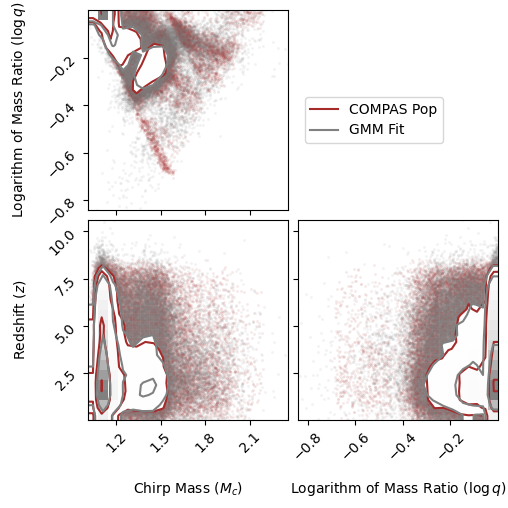

In [4]:
fig = corner.corner(np.array([Mc, logq, z]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$', r'Redshift $(z)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm, z_gm]).T, fig=fig, color='grey')

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 1.5, 1., .0), loc=6)
plt.savefig("Plots/Fig4_"+var+'_gmm_all.pdf');

In [5]:
mask = np.logical_and(logq>-0.7, logq<-0.5)
print('GMM can not fit', len(logq[mask])/len(logq)*100, '% samples.')

GMM can not fit 0.461 % samples.


In [6]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file:
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
    z = np.array(file['z_'+var])
file.close()

ns = len(Mc)

In [7]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_all'])
    means = np.array(file['mean_'+var+'_all'])
    covs = np.array(file['cov_'+var+'_all'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm, z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]
mask1 = logq_gm>0
logq_gm[mask1] = -logq_gm[mask1]

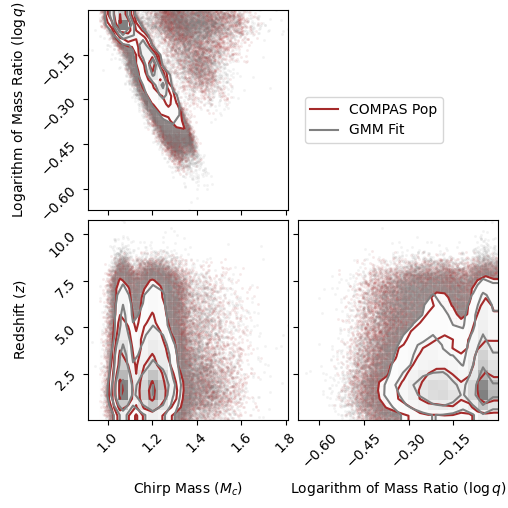

In [8]:
fig = corner.corner(np.array([Mc, logq, z]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$', r'Redshift $(z)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm, z_gm]).T, fig=fig, color='grey')

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 1.5, 1., .0), loc=6)
plt.savefig("Plots/Fig4_"+var+'_gmm_all.pdf');

In [9]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
file.close()

ns = len(Mc)

In [10]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_mass'])
    means = np.array(file['mean_'+var+'_mass'])
    covs = np.array(file['cov_'+var+'_mass'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm = gm_samp.T

mask = logq_gm>0
logq_gm[mask] = -logq_gm[mask]

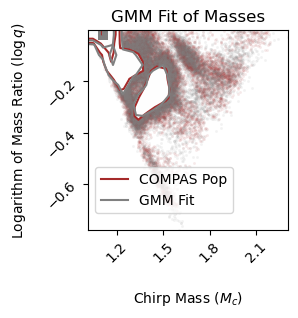

In [11]:
fig = corner.corner(np.array([Mc, logq]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm]).T, fig=fig, color='grey')

ndim = 2
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 0.2, 0., .0), loc=6)
plt.title('GMM Fit of Masses')
plt.savefig("Plots/Fig5_"+var+'_gmm_mass.pdf', bbox_inches="tight");

In [12]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    z = np.array(file['z_'+var])
file.close()

ns = len(z)

In [13]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_redshift'])
    means = np.array(file['mean_'+var+'_redshift'])
    covs = np.array(file['cov_'+var+'_redshift'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]

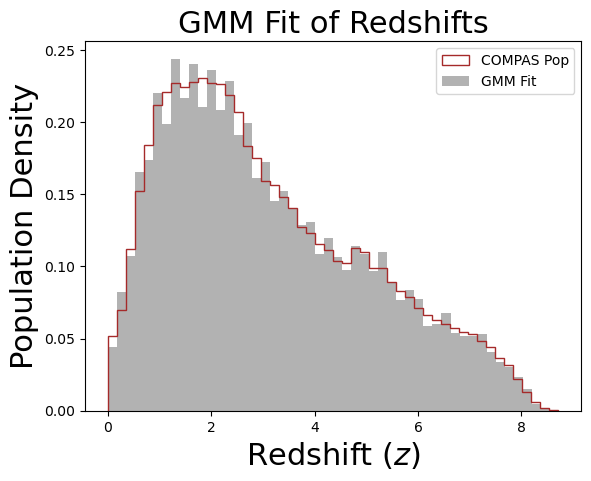

In [14]:
_ = plt.hist(z, bins=50, histtype='step', density=True, color='brown', label='COMPAS Pop')
_ = plt.hist(z_gm.flatten(), bins=50, density=True, color='grey', alpha=0.6, label='GMM Fit')
plt.legend()
plt.xlabel(r'Redshift ($z$)', fontsize=22)
plt.ylabel(r'Population Density', fontsize=22)
plt.title('GMM Fit of Redshifts', fontsize=22)
plt.savefig("Plots/Fig5_"+var+'_gmm_redshift.pdf', bbox_inches="tight");

In [15]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
file.close()

ns = len(Mc)

In [16]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_mass'])
    means = np.array(file['mean_'+var+'_mass'])
    covs = np.array(file['cov_'+var+'_mass'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm = gm_samp.T

mask = logq_gm>0
logq_gm[mask] = -logq_gm[mask]

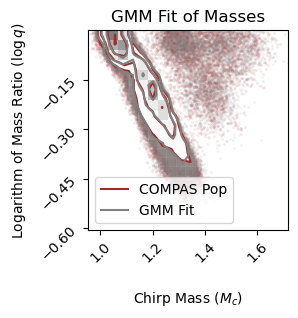

In [17]:
fig = corner.corner(np.array([Mc, logq]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm]).T, fig=fig, color='grey')

ndim = 2
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 0.15, 0., .0), loc=6)
plt.title('GMM Fit of Masses')
plt.savefig("Plots/Fig5_"+var+'_gmm_mass.pdf', bbox_inches="tight");

In [18]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    z = np.array(file['z_'+var])
file.close()

ns = len(z)

In [19]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_redshift'])
    means = np.array(file['mean_'+var+'_redshift'])
    covs = np.array(file['cov_'+var+'_redshift'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]

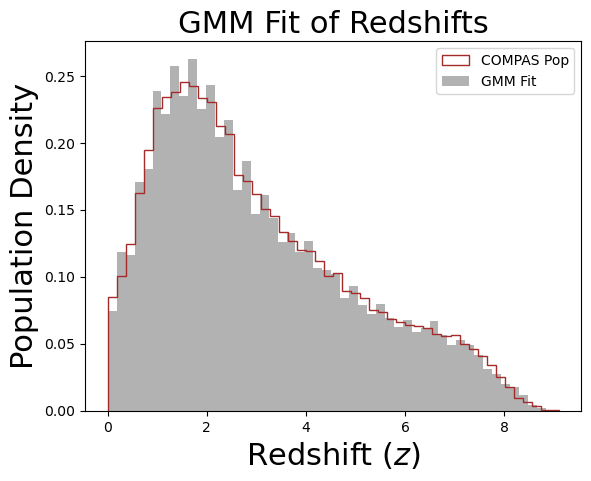

In [20]:
_ = plt.hist(z, bins=50, histtype='step', density=True, color='brown', label='COMPAS Pop')
_ = plt.hist(z_gm.flatten(), bins=50, density=True, color='grey', alpha=0.6, label='GMM Fit')
plt.legend()
plt.xlabel(r'Redshift ($z$)', fontsize=22)
plt.ylabel(r'Population Density', fontsize=22)
plt.title('GMM Fit of Redshifts', fontsize=22)
plt.savefig("Plots/Fig5_"+var+'_gmm_redshift.pdf', bbox_inches="tight");